<a href="https://colab.research.google.com/github/saransh-goel/emotion_detection/blob/main/Copy_of_threat_detection_taskA_mbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 29.0 MB/s 
     |████████████████████████████████| 432 kB 70.6 MB/s 
     |████████████████████████████████| 163 kB 73.5 MB/s 
     |████████████████████████████████| 6.6 MB 60.0 MB/s 
     |████████████████████████████████| 212 kB 75.1 MB/s 
     |████████████████████████████████| 115 kB 71.7 MB/s 
     |████████████████████████████████| 127 kB 78.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import pandas as pd
train_data = pd.read_excel("/content/drive/MyDrive/threat_detection_task/taskA/train.xlsx")
print(train_data)

      anger  disgust  fear  sadness  surprise  happiness  neutral  \
0         0        0     0        1         1          0        0   
1         0        0     0        0         0          1        0   
2         0        0     0        0         0          0        1   
3         0        0     0        0         0          0        1   
4         0        0     0        0         0          0        1   
...     ...      ...   ...      ...       ...        ...      ...   
7795      0        0     0        0         0          0        1   
7796      0        0     0        0         0          0        1   
7797      0        0     0        0         0          1        0   
7798      0        0     1        0         0          0        0   
7799      0        0     0        0         0          0        1   

                                              Sentences  
0                        محبت کے پردے میں نفرت کرنےوالو  
1     حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...

In [ ]:
def cal_distribution(data):
  labels = ["anger", "disgust", "fear", "sadness", "surprise", "happiness", "neutral"]
  arr = [0,0,0,0,0,0,0]
  for a in range(len(data)):
    for b in range(7):
      arr[b] += data[labels[b]][a]
  return arr

In [ ]:
arr = cal_distribution(data)
print(arr)

[811, 761, 609, 2190, 1550, 1046, 3014]


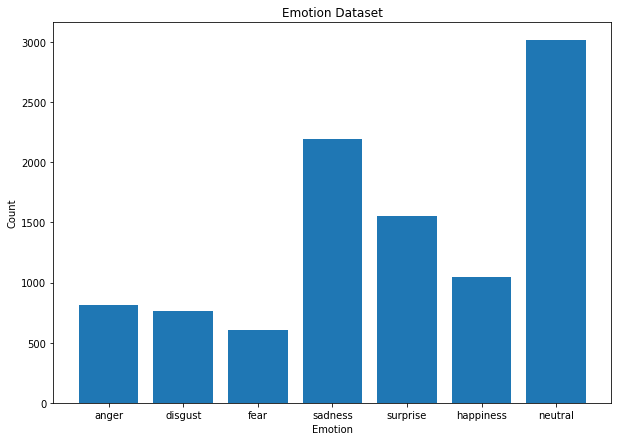

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
 
# plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 7]
# initializing the data
x = labels
y = arr
 
# plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Emotion Dataset")
 
# Adding label on the y-axis
plt.ylabel('Count')
 
# Adding label on the x-axis
plt.xlabel('Emotion')

plt.show()

In [ ]:
# dataset definition
from datasets import Dataset
import torch
class TrainDataset(Dataset):
  # load the dataset
  def __init__(self, encodings, anger, disgust, fear, sadness, surprise, happiness, neutral):
    # store the inputs and outputs
    self.encodings = encodings
    list1 = []
    for i in range(len(anger)):
      list1.append(torch.tensor([anger[i], disgust[i], fear[i], sadness[i], surprise[i], happiness[i], neutral[i]]).to(torch.float64))

    self.labels = torch.stack(list1)

  # number of rows in the dataset
  def __len__(self):
    return len(self.encodings['input_ids'])
  
  def __getitem__(self, idx):
    # item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    # item["labels"] = torch.tensor(self.labels[idx])
    item = list(torch.tensor(val[idx]) for key, val in self.encodings.items())
    item.append(torch.tensor(self.labels[idx]))
    return item

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding
checkpoint = "bert-base-multilingual-cased"
# checkpoint = "urduhack/roberta-urdu-small"
# checkpoint = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, truncation=True, padding=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(list(train_data['Sentences']), padding=True, truncation=True, max_length=512)
print(train_encodings["input_ids"][0])
print(train_encodings["input_ids"][1])
print(len(train_encodings["input_ids"][2]))
print(train_encodings[0])
print(train_encodings[10])

[101, 788, 84162, 10691, 12190, 22357, 10916, 12523, 10502, 34281, 37172, 11145, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dataset = TrainDataset(train_encodings, train_data['anger'], train_data['disgust'], train_data['fear'], train_data['sadness'], train_data['surprise'], train_data['happiness'], train_data['neutral'])

In [ ]:
from torch.utils.data import random_split
length = dataset.__len__()
alpha = 0.2
train_dataset, test_dataset = random_split(dataset, [int(length*(1-alpha)), int(length*alpha)])

In [ ]:
from torch.utils.data import DataLoader
train_dataset_ld = DataLoader(train_dataset, batch_size=2, shuffle=False)
test_dataset_ld = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [ ]:
from transformers import AutoModel
bert_model = AutoModel.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(bert_model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
# model definition
import torch.nn as nn
class ThreatDetectionModel(nn.Module):
  # define model elements
  def __init__(self, bert_model):
    super(ThreatDetectionModel, self).__init__()
    self.bert_model = bert_model
    self.layer1 = nn.Linear(768, 384)
    self.relu1 = nn.ReLU()
    self.layer2 = nn.Linear(384, 7)
    self.activation = nn.Sigmoid()

  # forward propagate input
  def forward(self, X):
    X = self.bert_model(X)
    # print(type(X))
    cls_train = X.last_hidden_state[:,0,:]
    X = self.layer1(cls_train)
    X = self.relu1(X)
    X = self.layer2(X)
    # print(list(X.shape))
    X = self.activation(X)
    return X

In [ ]:
my_model = ThreatDetectionModel(bert_model)
print(my_model)

ThreatDetectionModel(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [ ]:
def giveWeights(data_ld):
  class_names = ["anger", "disgust", "fear", "sadness", "surprise", "happiness", "neutral"]
  weights = [0,0,0,0,0,0,0]
  for a in data_ld:
    labels = a[2]
    for c in range(2):
      temp = labels[c]
      for b in range(7):
        if temp[b]==1:
          weights[b] += 1
  N = 2*len(data_ld)
  for b in range(7):
    weights[b] = (1/weights[b])*(N/7)
  return weights
  

  

In [ ]:
weights = giveWeights(train_dataset_ld)
print(weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[1.379920389208315, 1.473435655253837, 1.8118466898954706, 0.5134957208689928, 0.7241499361726819, 1.067579127459367, 0.3692744703515209]


In [ ]:
from torch.optim import SGD
criterion = nn.BCEWithLogitsLoss()
optimizer = SGD(my_model.parameters(), lr=5e-5, momentum=0.9)

In [ ]:
for epoch in range(1):
  # enumerate mini batches
  print("epoch {}".format(epoch))
  count = 0
  for index, ten1 in enumerate(train_dataset_ld):
    # print(inputs)
    # print(attention_mask)
    # print(targets)
    # clear the gradients
    if index<1530:
      count += 2
      continue
    optimizer.zero_grad()
    # compute the model output
    inputs = ten1[0]
    targets = ten1[3]
    yhat = my_model(inputs)
    # print("*****************OUTPUT OF MODEL IS:*********************")
    # print(yhat)
    # calculate loss
    loss = criterion(yhat.to(torch.float64), targets.to(torch.float64))
    # yhat_for_loss_cal = yhat.detach().numpy()
    # targets_for_loss_cal = targets.numpy()
    # targets_for_loss_cal = actual.reshape((len(targets_for_loss_cal),7))
    # loss = loss_fn(targets_for_loss_cal,yhat_for_loss_cal, 2)
    print(loss)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    count += 2
    if(count%10==0):
      print(count)
    # if(count==1000):
    #   break

epoch 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(0.7499, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7130, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7259, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7052, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7440, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
3070
tensor(0.7295, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7132, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7152, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7293, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7069, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
3080
tensor(0.7414, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropy

KeyboardInterrupt: ignored

In [ ]:
from numpy import vstack
from sklearn.metrics import accuracy_score
predictions, actuals = list(), list()
count = 0
for index, ten1 in enumerate(test_dataset_ld):
  #evaluate the model on the test set
  inputs = ten1[0]
  yhat = my_model(inputs)
  #retrieve numpy array
  yhat = yhat.detach().numpy()
  actual = targets.numpy()
  actual = actual.reshape((len(actual),7))
  print(yhat)
  yhat = yhat.round()
  print(yhat)
  print(actual)
  #round to class values
  
  #store
  predictions.append(yhat)
  actuals.append(actual)
  count += 2
  if(count%10==0):
    print(count)
  # if(count==100):
  #   break
predictions, actuals = vstack(predictions), vstack(actuals)
acc = accuracy_score(actuals, predictions)
print(acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[[0.12796685 0.08797508 0.10665149 0.11096527 0.07838444 0.09868298
  0.639302  ]
 [0.05857311 0.04063581 0.0465827  0.06741423 0.04946241 0.06131082
  0.60566324]]
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0.14351204 0.10376344 0.09281594 0.14316492 0.11234827 0.10456556
  0.54165965]
 [0.03821026 0.03246572 0.03088835 0.10973473 0.05334401 0.04383241
  0.08449672]]
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0.06612618 0.04757919 0.05512267 0.07175355 0.05691763 0.06296629
  0.6783059 ]
 [0.03896656 0.03322133 0.0315174  0.1107737  0.05419993 0.04411133
  0.08261512]]
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0.03832793 0.03309387 0.03094157 0.11169185 0.0534456  0.04435112
  0.08322535]
 [0.04011641 0.03449447 0.03188656 0.11322568 0.0545846  0.04400932
  0.07980579]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(
    actuals,
    predictions,
    output_dict=False,
    target_names=['Anger', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness', 'Neutral']
)
print(report)

              precision    recall  f1-score   support

       Anger       0.17      1.00      0.29       165
     Disgust       0.16      1.00      0.27       156
        Fear       0.12      1.00      0.21       117
     Sadness       0.46      1.00      0.63       454
    Surprise       0.33      1.00      0.49       319
   Happiness       0.22      1.00      0.35       211
     Neutral       1.00      0.96      0.98       600

   micro avg       0.31      0.99      0.47      2022
   macro avg       0.35      0.99      0.46      2022
weighted avg       0.51      0.99      0.60      2022
 samples avg       0.52      0.95      0.60      2022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
test_data = pd.read_excel("/content/drive/MyDrive/threat_detection_task/taskA/test.xlsx")
print(test_data)

                                              Sentences
0     بچھڑنے والوں کا کیسے نہ غم کِیا جائے یہ بَوجھ ...
1     اس خوفناک اذیت تشدد overlong گندگی میں بدترین ...
2     تمام ناقص جاز رپ آف کے lousiest افسوس میری ہر ...
3     اس فلم کے ساتھ راجر ایوری اور کوئنتن تارتانتین...
4     1930s کے جنگلی جانوروں، غیر ملکی خطوں اور غیر ...
...                                                 ...
1945  بڑا حوصلہ ہے نرسری کے بچے تو بہت چھوٹے ہوتے ہی...
1946  اسی فلم کے تین دیگر ورژن میں نے دیکھا، میں نے ...
1947  یونہی بس بول دیتا ہوں طبیعت ٹھیک ہے وگرنہ وہ ا...
1948                                 کبھی خوشیکبھی غم 😢
1949  ناقدین کی طرح میرے ایک دوست اس وغیرہ "آپ کا دل...

[1950 rows x 1 columns]


In [ ]:
# dataset definition
from datasets import Dataset
import torch
class TestDataset(Dataset):
  # load the dataset
  def __init__(self, encodings):
    # store the inputs and outputs
    self.encodings = encodings

  # number of rows in the dataset
  def __len__(self):
    return len(self.encodings['input_ids'])
  
  def __getitem__(self, idx):
    # item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    # item["labels"] = torch.tensor(self.labels[idx])
    item = list(torch.tensor(val[idx]) for key, val in self.encodings.items())
    return item

In [ ]:
# make a class prediction for one row of data
from torch import Tensor
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint, truncation=True, padding=True)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
test_encodings = tokenizer(list(test_data['Sentences']), padding=True, truncation=True, max_length=512)

In [ ]:
dataset = TestDataset(test_encodings)

In [ ]:
from torch.utils.data import DataLoader
test_dataset_ld_unlabeled = DataLoader(dataset, batch_size=2, shuffle=False)

In [ ]:
from numpy import vstack
from sklearn.metrics import accuracy_score
predictions = list()
count = 0
for i, (inputs, attention_mask) in enumerate(test_dataset_ld_unlabeled):
  #evaluate the model on the test set
  yhat = my_model(inputs)
  #retrieve numpy array
  yhat = yhat.detach().numpy()
  yhat = yhat.round()
  #round to class values
  
  #store
  predictions.append(yhat)
  count += 2
  if(count%10==0):
    print(count)
  # if(count==100):
  #   break

In [ ]:
import pandas as pd
train_data = pd.read_excel("/content/drive/MyDrive/threat_detection_task/taskA/train.xlsx")
print(train_data)

      anger  disgust  fear  sadness  surprise  happiness  neutral  \
0         0        0     0        1         1          0        0   
1         0        0     0        0         0          1        0   
2         0        0     0        0         0          0        1   
3         0        0     0        0         0          0        1   
4         0        0     0        0         0          0        1   
...     ...      ...   ...      ...       ...        ...      ...   
7795      0        0     0        0         0          0        1   
7796      0        0     0        0         0          0        1   
7797      0        0     0        0         0          1        0   
7798      0        0     1        0         0          0        0   
7799      0        0     0        0         0          0        1   

                                              Sentences  
0                        محبت کے پردے میں نفرت کرنےوالو  
1     حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...

In [ ]:
# Create a placeholder for spam model
from collections import Counter, defaultdict
model_spam = defaultdict(lambda: defaultdict(lambda: 0))
print(model_spam)

defaultdict(<function <lambda> at 0x7f5618f4f5f0>, {})


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('urdu'))
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


OSError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Sentences"]
X_test = test["Sentences"]
print(X_train.shape)
print(X_test.shape)

(5226,)
(2574,)


In [ ]:
categories = ["anger","disgust", "fear", "sadness", "surprise", "happiness", "neutral"]

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [ ]:
predictions = pd.DataFrame(index=test.index)
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    predictions[category] = prediction
    print('Test accuracy is {} precision is {} recall is {}'.format(accuracy_score(test[category], prediction), precision_score(test[category], prediction), recall_score(test[category], prediction)))
print(predictions)

In [ ]:
def MOD(arr):
  count = 0
  for a in arr:
    count += a
  return count

def OR(arr1, arr2):
  result = []
  for a in range(len(arr1)):
    if arr1[a]==1 or arr2[a]==1:
      result.append(1)
    else:
      result.append(0)
  return result


def AND(arr1, arr2):
  result = []
  for a in range(len(arr1)):
    if arr1[a]==1 and arr2[a]==1:
      result.append(1)
    else:
      result.append(0)
  return result

In [ ]:
accuracy_sum, precision_sum, recall_sum = 0,0,0
count = predictions.shape[0]
for a in predictions.index:
  test_arr = [test["anger"][a], test["disgust"][a], test["fear"][a], test["sadness"][a], test["surprise"][a], test["happiness"][a], test["neutral"][a]]
  prediction_arr = [predictions["anger"][a], predictions["disgust"][a], predictions["fear"][a], predictions["sadness"][a], predictions["surprise"][a], predictions["happiness"][a], predictions["neutral"][a]]
  accuracy_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(OR(test_arr,prediction_arr))+1)
  precision_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(prediction_arr)+1)
  recall_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(test_arr)+1)
accuracy = accuracy_sum/count
precision = precision_sum/count
recall = recall_sum/count
f1 = (2*precision*recall)/(precision+recall)

In [ ]:
print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1: ",f1)

ACCURACY:  0.6713221963221919
PRECISION:  0.9893162393162394
RECALL:  0.6748640248640206
F1:  0.8023817533458928


In [ ]:
import pandas as pd
test_data = pd.read_excel("/content/drive/MyDrive/threat_detection_task/taskA/test_labelled.xlsx")
print(test_data)

      anger  disgust  fear  sadness  surprise  happiness  neutral  \
0       0.0      0.0   0.0      1.0       0.0        0.0      0.0   
1       0.0      0.0   0.0      0.0       0.0        0.0      1.0   
2       0.0      0.0   0.0      0.0       0.0        0.0      1.0   
3       0.0      0.0   0.0      0.0       0.0        0.0      1.0   
4       0.0      0.0   0.0      0.0       0.0        0.0      1.0   
...     ...      ...   ...      ...       ...        ...      ...   
1945    0.0      0.0   0.0      0.0       1.0        0.0      0.0   
1946    0.0      0.0   0.0      0.0       0.0        0.0      1.0   
1947    0.0      0.0   0.0      1.0       0.0        0.0      0.0   
1948    0.0      0.0   0.0      1.0       1.0        1.0      0.0   
1949    0.0      0.0   0.0      0.0       0.0        0.0      1.0   

                                              Sentences  
0     بچھڑنے والوں کا کیسے نہ غم کِیا جائے یہ بَوجھ ...  
1     اس خوفناک اذیت تشدد overlong گندگی میں بدترین ...

In [ ]:
X_test_data = test_data["Sentences"]

In [ ]:
def getPredictions(pipeline, train_data, test_data):
  predictions = pd.DataFrame(index=test_data.index)
  categories = ["anger","disgust", "fear", "sadness", "surprise", "happiness", "neutral"]
  for category in categories:
      print('... Processing {}'.format(category))
      # train the model using X_dtm & y
      pipeline.fit(train_data["Sentences"], train_data[category])
      # compute the testing accuracy
      prediction = pipeline.predict(test_data["Sentences"])
      predictions[category] = prediction
  return predictions

In [ ]:
predictions_NB = getPredictions(NB_pipeline, train_data, test_data)
predictions_SVC = getPredictions(SVC_pipeline, train_data, test_data)
predictions_LR = getPredictions(LogReg_pipeline, train_data, test_data)

... Processing anger
... Processing disgust
... Processing fear
... Processing sadness
... Processing surprise
... Processing happiness
... Processing neutral
... Processing anger
... Processing disgust
... Processing fear
... Processing sadness
... Processing surprise
... Processing happiness
... Processing neutral
... Processing anger
... Processing disgust
... Processing fear
... Processing sadness
... Processing surprise
... Processing happiness
... Processing neutral


In [ ]:
def getScores(predictions, test_data):
  accuracy_sum, precision_sum, recall_sum = 0,0,0
  count = predictions.shape[0]
  for a in predictions.index:
    test_arr = [test_data["anger"][a], test_data["disgust"][a], test_data["fear"][a], test_data["sadness"][a], test_data["surprise"][a], test_data["happiness"][a], test_data["neutral"][a]]
    prediction_arr = [predictions["anger"][a], predictions["disgust"][a], predictions["fear"][a], predictions["sadness"][a], predictions["surprise"][a], predictions["happiness"][a], predictions["neutral"][a]]
    accuracy_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(OR(test_arr,prediction_arr))+1)
    precision_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(prediction_arr)+1)
    recall_sum += (MOD(AND(test_arr,prediction_arr))+1)/(MOD(test_arr)+1)
  accuracy = accuracy_sum/count
  precision = precision_sum/count
  recall = recall_sum/count
  f1 = (2*precision*recall)/(precision+recall)
  return [accuracy, precision, recall, f1]

In [ ]:
def printScores(arr):
  print("ACCURACY: ",arr[0])
  print("PRECISION: ",arr[1])
  print("RECALL: ",arr[2])
  print("F1: ",arr[3])

In [ ]:
printScores(getScores(predictions_NB, test_data))
printScores(getScores(predictions_SVC, test_data))
printScores(getScores(predictions_LR, test_data))

ACCURACY:  0.6800000000000002
PRECISION:  0.9892307692307692
RECALL:  0.6832478632478632
F1:  0.8082492609598089
ACCURACY:  0.798213675213676
PRECISION:  0.9165897435897444
RECALL:  0.8442136752136753
F1:  0.8789142363488869
ACCURACY:  0.7746581196581194
PRECISION:  0.9610256410256414
RECALL:  0.7930427350427346
F1:  0.8689905287654109
